<a href="https://colab.research.google.com/github/kimheeseo/calculator/blob/main/epoch20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import pandas as pd
import math
import sklearn
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler#MInMaxScaler 표준화
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')#구글드라이브에서 파일 열기

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [29]:
df=pd.read_csv('/content/gdrive/MyDrive/code/coca.csv',encoding='utf8')#df = 코카콜라주식
print('\ndf.info()')
df.info()
print('\ndf.head()')
df.head()#1962년부터 주가를 yahoo finance에서 조회가 가능한데, 가격이 저렴한 것이지, 아래의 값은 MinMaxScaler의 값이 아닙니다.


df.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15086 entries, 0 to 15085
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       15086 non-null  object 
 1   Open       15086 non-null  float64
 2   High       15086 non-null  float64
 3   Low        15086 non-null  float64
 4   Adj Close  15086 non-null  float64
 5   Volume     15086 non-null  int64  
 6   Close      15086 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 825.1+ KB

df.head()


,Date,Open,High,Low,Adj Close,Volume,Close
0,1962-01-03,0.259115,0.259115,0.253255,0.049994,1574400,0.257161
1,1962-01-04,0.257813,0.261068,0.257813,0.050374,844800,0.259115
2,1962-01-05,0.259115,0.262370,0.252604,0.049234,1420800,0.253255
3,1962-01-08,0.251302,0.251302,0.245768,0.048728,2035200,0.250651
4,1962-01-09,0.250651,0.256510,0.248698,0.049614,960000,0.255208


In [30]:
df.tail()

,Date,Open,High,Low,Adj Close,Volume,Close
15081,2021-11-30,53.599998,53.630001,52.439999,52.450001,30485200,52.450001
15082,2021-12-01,52.980000,53.520000,52.279999,52.299999,18719600,52.299999
15083,2021-12-02,52.599998,53.340000,52.509998,53.070000,17074200,53.070000
15084,2021-12-03,53.330002,53.610001,52.980000,53.540001,21062400,53.540001
15085,2021-12-06,54.310001,55.250000,54.139999,54.910000,26622900,54.910000


In [31]:
print('describe값')
df.describe()

describe값


,Open,High,Low,Adj Close,Volume,Close
count,15086.000000,15086.000000,15086.000000,15086.000000,1.508600e+04,15086.000000
mean,16.033093,16.165045,15.898840,11.341124,9.023160e+06,16.037467
std,16.915488,17.040094,16.787879,14.214715,7.923026e+06,16.917524
min,0.192708,0.193359,0.182292,0.037855,7.680000e+04,0.192057
25%,0.859700,0.869792,0.854167,0.242306,2.812800e+06,0.859375
50%,9.226562,9.367188,9.187500,4.611509,7.575200e+06,9.250000
75%,28.844687,29.143750,28.534063,17.220101,1.290605e+07,28.873750
max,59.810001,60.130001,59.619999,56.610435,1.241690e+08,60.130001



## **그래프 출력하기**

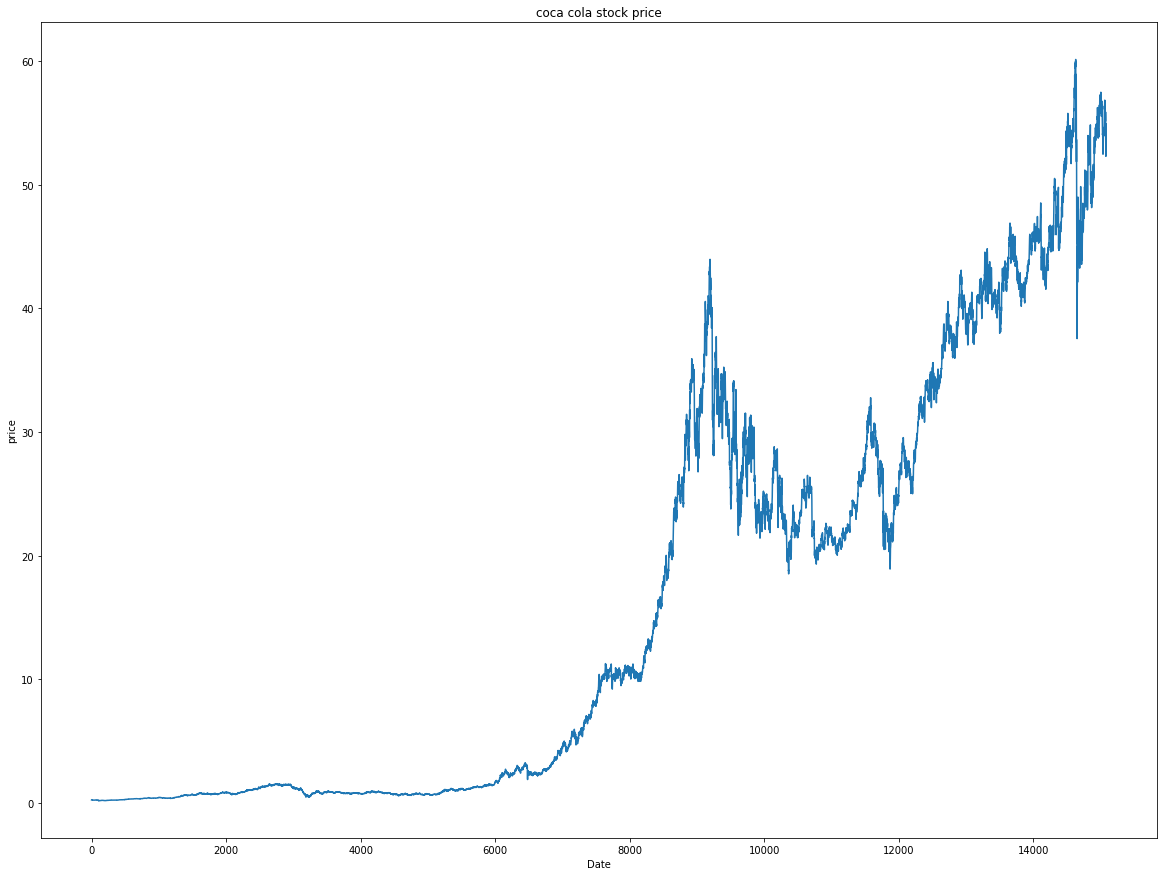

In [32]:
plt.figure(figsize=(20,15))
plt.title('coca cola stock price')
plt.plot(df['Close']) #종가를 기준으로 주가 그래프 그리기
plt.xlabel('Date')
plt.ylabel('price')
plt.show()

### **open, high, low, close마다 값차이 존재 확인**

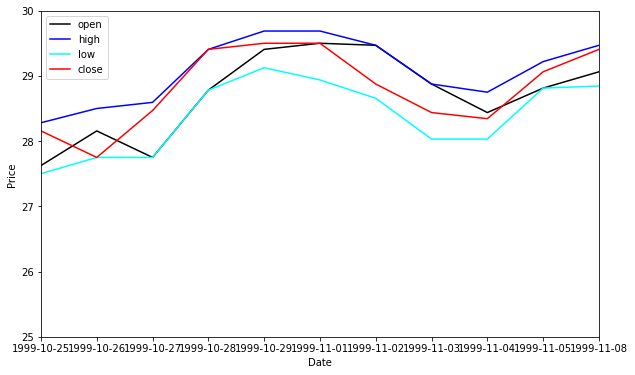

In [33]:
plt.figure(figsize=(10,6));
plt.plot(df.Date.values, df.Open.values, color='black',label='open')
plt.plot(df.Date.values, df.High.values, color='blue',label='high')
plt.plot(df.Date.values, df.Low.values, color='cyan',label='low')
plt.plot(df.Date.values, df.Close.values, color='red',label='close')

plt.xlabel('Date')
plt.xlim(9520,9530)
plt.ylim(25,30)
plt.ylabel('Price')
plt.legend(loc='best')

## **MinMaxScaler화 : 데이터 정규화**

In [34]:
print(df)

             Date       Open       High  ...  Adj Close    Volume      Close
0      1962-01-03   0.259115   0.259115  ...   0.049994   1574400   0.257161
1      1962-01-04   0.257813   0.261068  ...   0.050374    844800   0.259115
2      1962-01-05   0.259115   0.262370  ...   0.049234   1420800   0.253255
3      1962-01-08   0.251302   0.251302  ...   0.048728   2035200   0.250651
4      1962-01-09   0.250651   0.256510  ...   0.049614    960000   0.255208
...           ...        ...        ...  ...        ...       ...        ...
15081  2021-11-30  53.599998  53.630001  ...  52.450001  30485200  52.450001
15082  2021-12-01  52.980000  53.520000  ...  52.299999  18719600  52.299999
15083  2021-12-02  52.599998  53.340000  ...  53.070000  17074200  53.070000
15084  2021-12-03  53.330002  53.610001  ...  53.540001  21062400  53.540001
15085  2021-12-06  54.310001  55.250000  ...  54.910000  26622900  54.910000

[15086 rows x 7 columns]


In [35]:
scaler=MinMaxScaler()
df=df.iloc[:,1:]
scale_df=scaler.fit_transform(df)
print('scale_df값',scale_df)
print('scale_df.shape값',scale_df.shape)

scale_df값 [[1.11388821e-03 1.09709183e-03 1.19390541e-03 2.14573915e-04
  1.20684459e-02 1.08619008e-03]
 [1.09204891e-03 1.12967623e-03 1.27059074e-03 2.21290950e-04
  6.18894661e-03 1.11879046e-03]
 [1.11388821e-03 1.15139917e-03 1.18295277e-03 2.01139845e-04
  1.08306566e-02 1.02102268e-03]
 ...
 [8.79061886e-01 8.86713690e-01 8.80378949e-01 9.37417827e-01
  1.36973960e-01 8.82211492e-01]
 [8.91306722e-01 8.91218464e-01 8.88286421e-01 9.45725756e-01
  1.69112966e-01 8.90052952e-01]
 [9.07744889e-01 9.18580674e-01 9.07802634e-01 9.69942417e-01
  2.13922390e-01 9.12909909e-01]]
scale_df.shape값 (15086, 6)


In [36]:
print('df값',df)

df값             Open       High        Low  Adj Close    Volume      Close
0       0.259115   0.259115   0.253255   0.049994   1574400   0.257161
1       0.257813   0.261068   0.257813   0.050374    844800   0.259115
2       0.259115   0.262370   0.252604   0.049234   1420800   0.253255
3       0.251302   0.251302   0.245768   0.048728   2035200   0.250651
4       0.250651   0.256510   0.248698   0.049614    960000   0.255208
...          ...        ...        ...        ...       ...        ...
15081  53.599998  53.630001  52.439999  52.450001  30485200  52.450001
15082  52.980000  53.520000  52.279999  52.299999  18719600  52.299999
15083  52.599998  53.340000  52.509998  53.070000  17074200  53.070000
15084  53.330002  53.610001  52.980000  53.540001  21062400  53.540001
15085  54.310001  55.250000  54.139999  54.910000  26622900  54.910000

[15086 rows x 6 columns]


### **train값과 test값 구분**

test_close.shape값 (3017, 1)


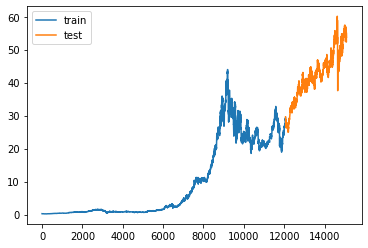

In [37]:
close1=df.iloc[:,5] #close1은 종가만 추출하는것.
train_close1=pd.DataFrame(close1[0:12069])
test_close1=pd.DataFrame(close1[12069:])
print('test_close.shape값',test_close1.shape)
ax=train_close1.plot()
test_close1.plot(ax=ax)
plt.legend(['train','test'])

In [38]:
df.head() #df에는 open, high, low, Adj close, volume, close값 존재.

,Open,High,Low,Adj Close,Volume,Close
0,0.259115,0.259115,0.253255,0.049994,1574400,0.257161
1,0.257813,0.261068,0.257813,0.050374,844800,0.259115
2,0.259115,0.262370,0.252604,0.049234,1420800,0.253255
3,0.251302,0.251302,0.245768,0.048728,2035200,0.250651
4,0.250651,0.256510,0.248698,0.049614,960000,0.255208


In [39]:
close1.head()

0    0.257161
1    0.259115
2    0.253255
3    0.250651
4    0.255208
Name: Close, dtype: float64

In [40]:
x=scale_df[:,0:3]
print('x값',x[0:4]) #open, high, low, adj close, volume
print('x.shape값',x.shape)
y=scale_df[:,5]
print('y값',y[0:3]) #close값
print('y.shape값',y.shape) #close값

x값 [[0.00111389 0.00109709 0.00119391]
 [0.00109205 0.00112968 0.00127059]
 [0.00111389 0.0011514  0.00118295]
 [0.00098284 0.00096674 0.00106794]]
x.shape값 (15086, 3)
y값 [0.00108619 0.00111879 0.00102102]
y.shape값 (15086,)


In [41]:
y=y.reshape(-1,1)
print('y.shape값',y.shape)
print('y값 일부출력\n',y[0:1])

y.shape값 (15086, 1)
y값 일부출력
 [[0.00108619]]


# **위의 y값으로 구한 MinMaxScaler값과 단독으로**
# **Close값만 뽑아서 MinMaxScaler를 구한 값이 같다는 것을 확인가능**. 

In [42]:
close=df['Close']#close값만 추출
print('close값',close)
train_close1=close[0:12069]
test_close1=close[12069:]

scaler=MinMaxScaler(feature_range=(0,1))
scale_close=scaler.fit_transform(np.array(close).reshape(-1,1))#close값 MinMaxScaler 사용
print('scale_close값',scale_close)
print('scale_close.shape값',scale_close.shape)  #정리하면, 전체 데이터에서 close값만을 추출하여 close에 대입.

close값 0         0.257161
1         0.259115
2         0.253255
3         0.250651
4         0.255208
           ...    
15081    52.450001
15082    52.299999
15083    53.070000
15084    53.540001
15085    54.910000
Name: Close, Length: 15086, dtype: float64
scale_close값 [[0.00108619]
 [0.00111879]
 [0.00102102]
 ...
 [0.88221149]
 [0.89005295]
 [0.91290991]]
scale_close.shape값 (15086, 1)


# **train, test 구분하기 8:2 & MinMaxScaler**

In [43]:
train_close=scale_close[0:12069]  #close값 train : 0.8만큼 추출
#val_close=scale_close[9052:12069]  #test_close=scale_close[12069:]
test_close=scale_close[12069:]
print('test_close값',test_close1.shape)
#print('val_close값',val_close.shape)
print('train_close값',train_close1.shape)

test_close값 (3017,)
train_close값 (12069,)


In [44]:
print(train_close[0:5]) #정리하면, train_close, test_close의 경우, close만을 뽑은 값을 train, test로 구분한 것.

[[0.00108619]
 [0.00111879]
 [0.00102102]
 [0.00097758]
 [0.00105361]]


In [45]:
train_sc_df = pd.DataFrame(train_close, columns=['Close'], index=train_close1.index)
test_sc_df = pd.DataFrame(test_close, columns=['Close'], index=test_close1.index) #train_sc_df는 close값만을 뽑은 train_close1을 사용.

In [46]:
print('train_close1값',train_close1)
print('\n') 
print('test_close1값',test_close1) #minmaxscaler하지 않은 test, train값 구분

train_close1값 0         0.257161
1         0.259115
2         0.253255
3         0.250651
4         0.255208
           ...    
12064    28.745001
12065    28.934999
12066    28.840000
12067    28.915001
12068    29.290001
Name: Close, Length: 12069, dtype: float64


test_close1값 12069    29.555000
12070    29.520000
12071    29.530001
12072    29.209999
12073    28.490000
           ...    
15081    52.450001
15082    52.299999
15083    53.070000
15084    53.540001
15085    54.910000
Name: Close, Length: 3017, dtype: float64


In [47]:
print('train_sc_df값',train_sc_df)  #close값을 기준으로 뽑은 값을 MinMaxScaler화
print('test_sc_df값',test_sc_df)

train_sc_df값           Close
0      0.001086
1      0.001119
2      0.001021
3      0.000978
4      0.001054
...         ...
12064  0.476375
12065  0.479545
12066  0.477960
12067  0.479211
12068  0.485468

[12069 rows x 1 columns]
test_sc_df값           Close
12069  0.489889
12070  0.489305
12071  0.489472
12072  0.484133
12073  0.472121
...         ...
15081  0.871867
15082  0.869365
15083  0.882211
15084  0.890053
15085  0.912910

[3017 rows x 1 columns]


In [48]:
for i in range(1, 22):
    train_sc_df ['day{}'.format(i)]=train_sc_df ['Close'].shift(i)
    test_sc_df ['day{}'.format(i)]=test_sc_df ['Close'].shift(i)

In [49]:
x_train=train_sc_df.dropna().drop('Close', axis=1)
y_train=train_sc_df.dropna()[['Close']]

x_test=test_sc_df.dropna().drop('Close', axis=1)
y_test=test_sc_df.dropna()[['Close']]

x_train=x_train.values
x_test=x_test.values

y_train=y_train.values
y_test=y_test.values
print('x_test.shape값',x_test.shape)
print('x_test값',x_test)
print('x_train.shape값',x_train.shape)
print('x_train값',x_train)

x_test.shape값 (2996, 21)
x_test값 [[0.4712865  0.46619789 0.45685491 ... 0.48947198 0.48930512 0.48988906]
 [0.47253776 0.4712865  0.46619789 ... 0.48413309 0.48947198 0.48930512]
 [0.47337199 0.47253776 0.4712865  ... 0.47212068 0.48413309 0.48947198]
 ...
 [0.86936486 0.87186748 0.90740425 ... 0.9411057  0.93593374 0.93276374]
 [0.88221149 0.86936486 0.87186748 ... 0.94510988 0.9411057  0.93593374]
 [0.89005295 0.88221149 0.86936486 ... 0.93660111 0.94510988 0.9411057 ]]
x_train.shape값 (12048, 21)
x_train값 [[0.00084724 0.00068973 0.00070603 ... 0.00102102 0.00111879 0.00108619]
 [0.00087983 0.00084724 0.00068973 ... 0.00097758 0.00102102 0.00111879]
 [0.00092327 0.00087983 0.00084724 ... 0.00105361 0.00097758 0.00102102]
 ...
 [0.47954501 0.4763751  0.47453985 ... 0.4623606  0.45960774 0.45134922]
 [0.47796005 0.47954501 0.4763751  ... 0.46503003 0.4623606  0.45960774]
 [0.47921137 0.47796005 0.47954501 ... 0.46344503 0.46503003 0.4623606 ]]


In [50]:
print('train_close값',train_close.shape)
print('x_train.shape값',x_train.shape)
print('x_test.shape값',x_test.shape)
#print('x_val.shape값',x_val.shape)
print('\n')
print('y_train.shape값',y_train.shape)
print('y_test.shape값',y_test.shape)
#print('y_val.shape값',y_val.shape)

train_close값 (12069, 1)
x_train.shape값 (12048, 21)
x_test.shape값 (2996, 21)


y_train.shape값 (12048, 1)
y_test.shape값 (2996, 1)


In [51]:
x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

print('x_train.shape값',x_train.shape)
print('x_test.shape값',x_test.shape)

print('y_train.shape값',y_train.shape)
print('y_test.shape값',y_test.shape)

x_train.shape값 (12048, 21, 1)
x_test.shape값 (2996, 21, 1)
y_train.shape값 (12048, 1)
y_test.shape값 (2996, 1)


## **Model**

In [52]:
model=Sequential()
model.add(LSTM(21,return_sequences=True, input_shape=(21,1)))
model.add(LSTM(40,return_sequences=False))
model.add(Dense(1,activation='linear'))
model.compile(loss='mse',optimizer='Adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 21, 21)            1932      
                                                                 
 lstm_3 (LSTM)               (None, 40)                9920      
                                                                 
 dense_1 (Dense)             (None, 1)                 41        
                                                                 
Total params: 11,893
Trainable params: 11,893
Non-trainable params: 0
_________________________________________________________________


In [53]:
#model.fit(x_train,y_train, validation_data=(x_test,y_test),batch_size=10, epochs=20)
#과적합test가 들어가서 완벽한 검증이 안된다. 따라서 train, test, vali : 6 : 2: 2로 구분
#model.fit(x_train,y_train, validation_data=(x_test,y_test),batch_size=10, epochs=20)
#model.fit(x_train,y_train, validation_data=(x_val,y_val),batch_size=10, epochs=20)
model.fit(x_train,y_train, verbose=1,batch_size=10, epochs=20)

Epoch 1/20
1205/1205 [==============================] - 22s 16ms/step - loss: 4.5484e-04
Epoch 2/20
1205/1205 [==============================] - 19s 16ms/step - loss: 1.9754e-04
Epoch 3/20
1205/1205 [==============================] - 19s 16ms/step - loss: 1.7277e-04
Epoch 4/20
1205/1205 [==============================] - 19s 16ms/step - loss: 1.4709e-04
Epoch 5/20
1205/1205 [==============================] - 19s 15ms/step - loss: 1.0620e-04
Epoch 6/20
1205/1205 [==============================] - 19s 16ms/step - loss: 1.1222e-04
Epoch 7/20
1205/1205 [==============================] - 19s 16ms/step - loss: 9.1841e-05
Epoch 8/20
1205/1205 [==============================] - 19s 16ms/step - loss: 8.6673e-05
Epoch 9/20
1205/1205 [==============================] - 19s 16ms/step - loss: 8.2846e-05
Epoch 10/20
1205/1205 [==============================] - 19s 16ms/step - loss: 8.1441e-05
Epoch 11/20
1205/1205 [==============================] - 20s 16ms/step - loss: 6.9169e-05
Epoch 12/20
1205/12

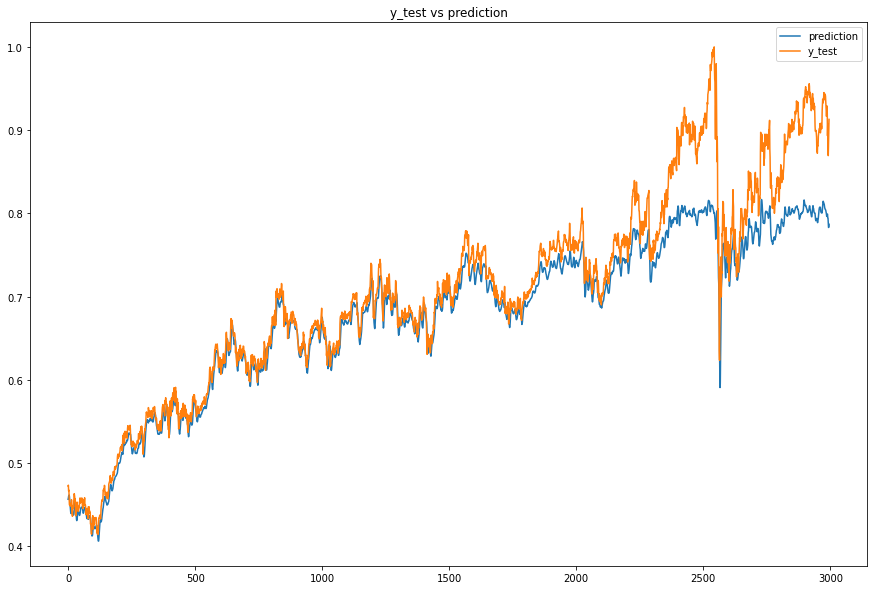

In [54]:
plt.figure(figsize=(15,10))
y_pred = model.predict(x_test)
plt.plot(y_pred,label='prediction')
plt.plot(y_test,label='y_test')
plt.title('y_test vs prediction')

plt.legend()
plt.show()   #이를 통해 model값 자체가 x_test로 구한 값과 y_test의 오차가 적기에, 정확하게 구현하였음을 확인하였습니다.

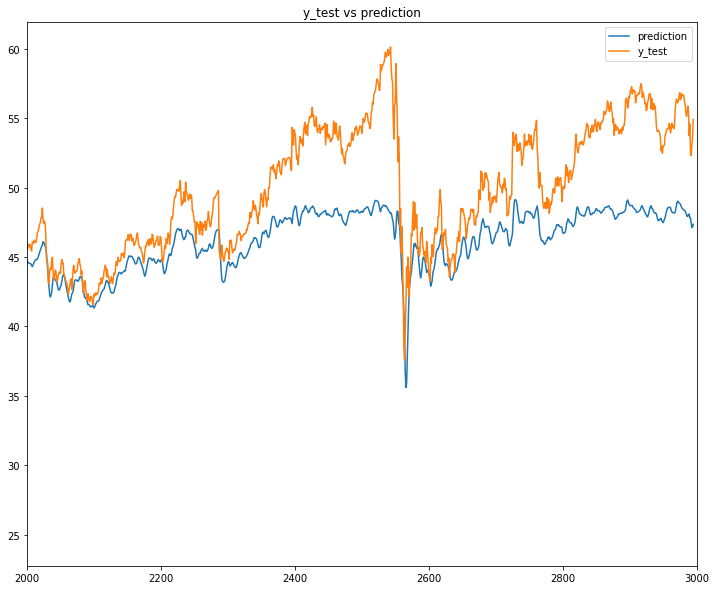

In [55]:
plt.figure(figsize=(12,10))
y_pred = model.predict(x_test)
plt.xlim([2000,3000])
#plt.ylim([0.7,0.86])
y_pred=scaler.inverse_transform(y_pred)
y_test=scaler.inverse_transform(y_test)
plt.plot(y_pred,label='prediction')
plt.plot(y_test,label='y_test')
plt.title('y_test vs prediction')

plt.legend()
plt.show()

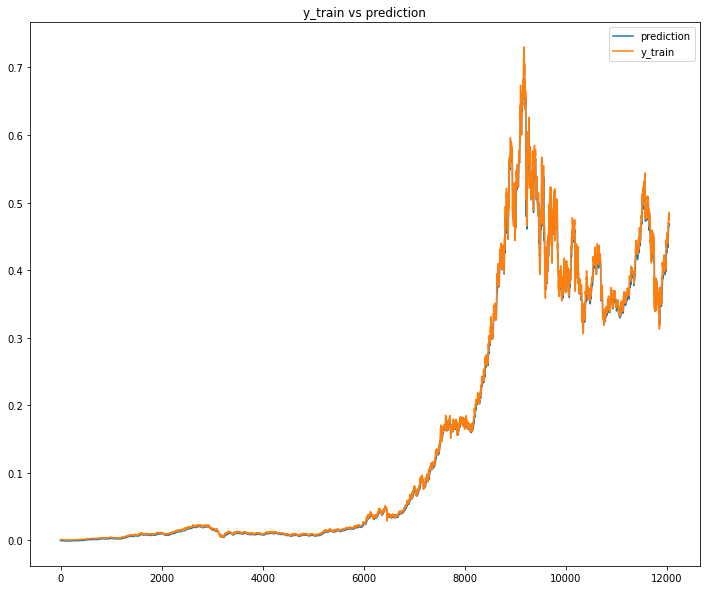

In [56]:
plt.figure(figsize=(12,10))
prediction = model.predict(x_train)
plt.plot(prediction,label='prediction')
plt.plot(y_train,label='y_train')
plt.title('y_train vs prediction')
plt.legend()
plt.show() #이를 통해 model값 자체가 x_train로 구한 값과 y_train의 오차가 적기에, 정확하게 구현하였음을 확인하였습니다.

In [57]:
print('x_train.shape값',x_train.shape)
print('x_test.shape값',x_test.shape)
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)
print('\ntrain_predict값',train_predict)
print('\ntest_predict값',test_predict)

print('\ntrain_predict.shape값',train_predict.shape)
print('test_predict.shape값',test_predict.shape)

x_train.shape값 (12048, 21, 1)
x_test.shape값 (2996, 21, 1)

train_predict값 [[-0.00054073]
 [-0.00054286]
 [-0.00054359]
 ...
 [ 0.46716166]
 [ 0.46725222]
 [ 0.46779194]]

test_predict값 [[0.45651063]
 [0.45790258]
 [0.46007678]
 ...
 [0.7830517 ]
 [0.7833257 ]
 [0.7868923 ]]

train_predict.shape값 (12048, 1)
test_predict.shape값 (2996, 1)


# **RMSE값**

In [58]:
import math #RMSE : y_test,train값과 model에 넣은 값인 predict값의 RMSE값 계산
from sklearn.metrics import mean_squared_error
print('y_test.shape값',y_test.shape)
print('test_predict.shaper값',test_predict.shape)
print('test_RMSE값')
testRMSE=math.sqrt(mean_squared_error(y_test, test_predict))
print(testRMSE)
print('train_predict.shaper값',train_predict.shape)
print('train_RMSE값')
math.sqrt(mean_squared_error(y_train, train_predict))

y_test.shape값 (2996, 1)

test_predict.shaper값 (2996, 1)

test_RMSE값
42.277919653780515

train_predict.shaper값 (12048, 1)

train_RMSE값


0.007742800170249974